## Project Overview

A Universal Basic Income (UBI) has been touted as a potential solution to many issues in the current U.S. welfare system. Besides being overly-complex, the current U.S. tax code (the basis of the welfare system) incorporates welfare cliffs that often lead to the most vulnerable passing up better work or life opportunities that would move them out of eligibiltiy for their necessary benefits. The burden of constant means-testing to prove one's eligibility wastes both recipients' time and resources in proving their own poverty, and costs excessive amounts of inefficient and expensive bureaucracy and administration of such programs. Rather than waste money and effort on these difficult and expensive means-testing programs, a UBI proposes to both eradicate admin costs and stigma associated with receiving benefits by promising each citizen a basic income regardless of their own income (Ghatak & Maniquet, 2019). 

Proponents of UBI strongly advocate for this move, but others point out that if the main goal of a welfare program is to reduce poverty, then targeting benefits (rather than making them universal) is still the more effective move. A non-targeted program like UBI would waste perfectly good money that could have been better spent by those at the bottom of the income distribution by distributing money to all (Ghatak & Maniquet, 2019). 

In this project I will attempt to determine whether a non-targeted UBI or the targeted means-tested U.S. tax system is in fact better at reducing poverty and inequality. To do so, I first estimate the poverty rate and income inequality in a sample of the U.S. population before taxes as a baseline. I then simulate the impacts of a very basic self-written UBI funded by a flat-tax using data from the CPS against a simplified version of the U.S. tax code. I then compare these results to see which welfare model is better able to reduce poverty and income inequality. I conclude by using my results to compare how a UBI performs compared to the current targeted and progressive tax system at improving these measures of economic wellbeing. 

## Data Preparation: CPS ASEC

The data that this project will use is the Annual Social and Economic (ASEC) supplement to the Current Population Survey (CPS) from IPUMS from 2019 (see https://cps.ipums.org/cps-action/variables/group?id=core_demographic). This supplement contains additional microdata on income which I will utilize to calculate overall tax revenues in my models (the UBI model and the progressive tax model). The dataset also includes a variable for household tax liability. I have downloaded variables related to age, sex, tax filing status, marital status, household income, gross adjusted income, and federally taxable income (among other variables) for each of those years for all individuals in those samples. I choose 2019 since that is the year before COVID distributions began, which are not an accurate representation of the standard U.S. tax system and, if incorporated, could cause my results to overestimate the poverty-reducing impact of the current tax system. I have attached my codebook as a pdf in the submission as well. 


The data file is called `cps_00007.csv`. The file contains the following variables, including:

* YEAR (Survey year)
* SERIAL (Household serial number)
* MONTH (Month)
* CPSID (CPSID, household record)
* ASECFLAG (Flag for if observation was part of original ASEC)
* ASECWTH (Annual Social and Economic Supplement Household weight)
* STATEFIP (State (FIPS code))
* HHINCOME (Total household income)
* PERNUM (Person number in sample unit)
* CPSIDP (This combines CPSID and PERNUM to create a unique identifier for each person in the dataset. It is the same across interviews so that you can identify a person using this variable.
* ASECWT (Annual Social and Economic Supplement Weight)
* AGE (Age)
* SEX (Sex)
* RACE (Race)
* MARST (Marital status): 
  - 1	Married, spouse present
  - 2	Married, spouse absent
  - 3	Separated
  - 4	Divorced
  - 5	Widowed
  - 6	Never married/single
  - 7	Widowed or Divorced
  - 9	NIU
* POPSTAT (Adult civilian, armed forces, or child)
  - 1	Adult civilian
  - 2	Armed Forces
  - 3	Child
* FTOTVAL 
  - reports the total income for the respondent's family. Amounts are expressed as they were reported to the interviewer (i.e., in the survey year's dollar amounts). Users may want to adjust for inflation using Consumer Price Index adjustment factors. (FTOTVAL relies on Census-defined families. For more on Census families see FTYPE and FAMREL. This is a different definition from IPUMS-derived families as in FAMUNIT))
* INCTOT 
  - indicates each respondent's total pre-tax personal income or losses from all sources for the previous calendar year. Amounts are expressed as they were reported to the interviewer; users must adjust for inflation using Consumer Price Index adjustment factors.)
* INCWAGE 
  - indicates each respondent's total pre-tax wage and salary income--that is, money received as an employee--for the previous calendar year. Amounts are expressed as they were reported to the interviewer; users must adjust for inflation using Consumer Price Index adjustment factors.)
* ADJGINC (Adjusted gross income)
* FEDTAX (Federal income tax liability, before credits)
* FEDTAXAC (Federal income tax liability, after all credits)
* FILESTAT (Tax filer status)
  - 0	No data
  - 1	Joint, both less than 65
  - 2	Joint, one less than 65, one 65+
  - 3	Joint, both 65+
  - 4	Head of household
  - 5	Single
  - 6	Nonfiler
* MARGTAX (Federal income marginal tax rate)
* TAXINC 
  - For income tax purposes, TAXINC, or taxable income, consists of adjusted gross income (ADJGINC) minus allowable itemized deductions (or a standard allowance amount) and exemptions for the taxpayer and his or her dependents. Taxable income is the amount used in the calculation of an individual's income tax liability.


**Data Limitations**: 

It is important to note that, in order to protect the privacy of certain high-income individuals, the CPS has top-coded high income for certain variables (TAXINC, for example), which means that this analysis cannot be as accurate as something like the NBER's simulation of the US tax code (not that it was going to be in the first place). It also means that the federal revenues calculated below will be underestimated, and other calculations may be altered. 

Additionally, the data on income does not distinguish whether income comes from Social Security, Disability, or Supplemental Security Income (SSI) benefits. This is an important fact for determining individual poverty for the elderly in particular. This information does exist, but the complexity involved in separating out these regular benefit programs in addition to the other tasks necessary for this work were outside the limited scope (but more notably, timeframe) of this project. This is an important additional step to incorporate in future work regarding UBI, however. The data also do not contain a variable that lists the tax liability or net benefits per household - this is only reported at a per-individual level, so I construct this measure myself. 

**Load Data:**

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

In [3]:
df = pd.read_csv('cps_00007_data.csv').set_index(["YEAR"])
df.head()

,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,STATEFIP,HHINCOME,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,POPSTAT,FAMSIZE,FTOTVAL,INCTOT,INCWAGE,ADJGINC,FEDTAX,FEDTAXAC,FILESTAT,MARGTAX,TAXINC
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,
2019,4,3,20180302857800,1,2031.67,23,18000,1,20180302857801,2031.67,21,1,100,6,1,1,18000,18000,18000,18000,600,600,5,10,6000
2019,6,3,20190302835500,1,1232.04,23,21780,1,20190302835501,1232.04,85,2,100,5,1,1,21780,21780,0,18000,440,440,5,10,4400
2019,7,3,20190302846800,1,1209.17,23,12000,1,20190302846801,1209.17,61,2,100,6,1,1,12000,12000,12000,12000,0,-250,5,0,0
2019,8,3,20190302822300,1,1146.23,23,22727,1,20190302822301,1146.23,73,2,100,4,1,2,22727,10727,0,0,0,0,6,0,0
2019,8,3,20190302822300,1,1146.23,23,22727,2,20190302822302,1480.79,37,1,100,6,1,2,22727,12000,12000,12000,0,-250,5,0,0


Note: I have chosen 2019 since it is the last of year of "normal" pre-COVID conditions, and incorporating COVID would require compensating for the universal COVID checks (an interesting concept but outside the scope of this project). 

**Read in Poverty Thresholds**

In [4]:
pov_thresh = pd.read_excel('2019_poverty_thresholds.xlsx')
pov_thresh.set_index('FAMSIZE')

,THRESH
FAMSIZE,
1,12490.0
2,16910.0
3,21330.0
4,25750.0
5,30170.0
6,34590.0
7,39010.0
8,43430.0
9,47850.0


The original excel sheet containing historical poverty thresholds used in this project released by the Office of the Assistant Secretary of Planning and Evaluation (ASPE) can be found here: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines (Poverty Guidelines, 2022). The version loaded here is edited by me to fill in thresholds according to ASPE's rules for additional family members. 

### Clean Data:

**Add Categorization of Race:** 

In [5]:
#recode race to categorical 
def race_cat(row): 
    'write a function that assigns a categorical race to each person'
    if row['RACE'] == 100: 
        val = 'White'
    elif row['RACE'] == 200: 
        val = 'Black'
    elif row['RACE'] == 300: 
        val = 'American Indian/Aleut/Eskimo'
    elif row['RACE'] == 650: 
        val = 'Asian or Pacific Islander'
    elif row['RACE'] == 651: 
        val = 'Asian Only'
    elif row['RACE'] == 652: 
        val = 'Hawaiian/Pacific Islander only'
    elif row['RACE'] == 700: 
        val = 'Other (single) race, n.e.c'
    elif row['RACE'] == 801: 
        val = 'White-Black'   
    elif row['RACE'] == 802: 
        val = 'White-American Indian'
    elif row['RACE'] == 803: 
        val = 'White-Asian'
    elif row['RACE'] == 804: 
        val = 'White-Hawaiian/Pacific Islander'
    elif row['RACE'] == 805: 
        val = 'Black-American Indian'
    elif row['RACE'] == 806: 
        val = 'Black-Asian' 
    elif row['RACE'] == 807: 
        val = 'Black-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 808: 
        val = 'American Indian-Asian' 
    elif row['RACE'] == 809: 
        val = 'Asian-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 810: 
        val = 'White-Black-American Indian' 
    elif row['RACE'] == 811: 
        val = 'White-Black-Asian' 
    elif row['RACE'] == 812: 
        val = 'White-American Indian-Asian' 
    elif row['RACE'] == 813: 
        val = 'White-Asian-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 814: 
        val = 'White-Black-American Indian-Asian' 
    elif row['RACE'] == 815: 
        val = 'American Indian-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 816: 
        val = 'White-Black--Hawaiian/Pacific Islander'
    elif row['RACE'] == 817: 
        val = 'White-American Indian-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 818: 
        val = 'Black-American Indian-Asian' 
    elif row['RACE'] == 819: 
        val = 'White-American Indian-Asiain-Hawaiian/Pacific Islander' 
    elif row['RACE'] == 820: 
        val = 'Two or three races, unspecified' 
    elif row['RACE'] == 830: 
        val = 'Four or five races, unspecified'  
    else: 
        val = 'Blank'
    return val 

#create new column 'Good' using the function above
df['RACE_CAT'] = df.apply(race_cat, axis=1)

In [6]:
df['RACE_CAT'].value_counts()

White                                                     139006
Black                                                      21141
Asian Only                                                 11226
American Indian/Aleut/Eskimo                                2808
White-Black                                                 1535
White-American Indian                                       1488
White-Asian                                                  952
Hawaiian/Pacific Islander only                               931
White-Hawaiian/Pacific Islander                              206
Black-American Indian                                        174
Asian-Hawaiian/Pacific Islander                              143
White-Asian-Hawaiian/Pacific Islander                        130
White-Black-American Indian                                  126
Black-Asian                                                   69
White-Black-Asian                                             41
White-American Indian-Asi

**Drop any CPSIDP's that are invalid (= 0):** 

Unfortunately, there are 61,993 CPSID's equal to 0. This is because these individuals were part of the ASEC overample, but since they lack identifiers, I must drop them. Without an identifier, they cannot be linked to family members, and my poverty thresholds will not be accurate. The remaining ones can be linked to other individuals, and so the thresholds can be applied to them.  

In [7]:
df = df[df['CPSIDP'] != 0]
duplicates = df[df.duplicated(['CPSIDP'])]
duplicates['CPSIDP']

Series([], Name: CPSIDP, dtype: int64)

It is not surprising that the dataset does not contain repeats (outside of invalid CPSIDP's). This is because the ASEC is drawn only once per year as the "March Supplement." According to a report by the University of Minnesota Population Center, "The technical name for this supplement since 2003 is the Annual Social and Economic Supplement (ASEC) or the Annual Demographic File (ADF) between 1947 and 2003. The ASEC was first introduced in 1947. Between 1947 and 1955, the ASEC was administered in April and included households from the April Basic Monthly CPS. After 1955, the ASEC was implemented in March, and began being commonly referred to as the "March Supplement." Between 1956 and 1975, the ASEC consisted only of respondents from the March Basic Monthly CPS. Over time, the ASEC sample has expanded to improve the reliability of information about certain subpopulations (i.e. persons of Spanish (Hispanic) origin and low-income children who do not have health insurance coverage). Currently, the ASEC contains basic monthly demographic and labor force data as well as supplementary data on work experience, income, noncash benefits, and migration. Given the expansion and implementation of the ASEC – drawing the ASEC sample from the March Basic Monthly CPS and households from non-March Basic Monthly CPS samples – there are complications for longitudinal linking of Basic Monthly CPS files." (Flood & Pacas, 2016, p. 5). 

**Variable that Classifies Who is in Poverty**

Calculating the number of individuals in poverty is a tricky business, and not as simple as determining who lives underneath an annual income threshold of one set amount. The modern threshold adhered to by most researchers is the Official Poverty Measure (OPM) which is released and calculated by the CPS 
(How is Poverty Measured?). This measure accounts for how many individuals live in a household, what the cost is of food and services, and other goods, to get a better idea of how many individuals cannot afford their basic needs. The official poverty guidelines are updated and released annually by the Office of the Assistant Secretary For Planning and Evaluation (ASPE). In this research I use the guidelines for 2019. The alternative would have been to use the Supplemental Poverty Measure (SPM), which provides an alternative view of poverty in the United States that better reflects life in the 21st century, including contemporary social and economic realities and government policy. As its name suggests, the SPM supplements but does not replace the official poverty measure, which remains the nation’s source for official poverty statistics and for determining means-tested program eligibility (How is Poverty Measured?). However, computing its thresholds involve a level of complexity that due to time constraints are for now outside the scope of this work, so I have chosen to utilize the OPM thresholds for the purposes of this work. Future projects will utilize the SPM, since it is technically the latest poverty measure. 

OPM Guidelines for 2021 and all historical ones (such as the one for 2019) can be found at the following link: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines (Poverty Guidelines, 2022). 

When applying the poverty guidelines, a key question is which income counts as the main income to apply them to. The ASPE does not answer this question, since many programs choose to define income in their own way: 

"Are the poverty guidelines before-tax or after-tax? Are they gross income or net income? What definition of income is used with the poverty guidelines?
There is no simple answer to these questions. When determining program eligibility, some agencies compare before-tax income to the poverty guidelines, while other agencies compare after-tax income. Likewise, eligibility can be dependent on gross income, net income, or some other measure of income. Federal, state, and local program offices that use the poverty guidelines for eligibility purposes may define income in different ways. To find out the specific definition of income (before-tax, after-tax, etc.) used by a particular program or activity, one must consult the office or organization that administers that program. While there is no standard definition of income for program eligibility purposes, the Census Bureau uses a standard definition of income for computing poverty statistics based on the official poverty thresholds" (Institute for Research on Poverty). 

For the purposes of this project, I will utilize the pre-tax income amount, HHINCOME, along with FAMSIZE (household income and family size) to assign each individual to poverty or not according to which threshold they fall into. 

In [8]:
summary = df.agg(
    {
        "FAMSIZE": ["min", "max", "mean", "median"]
    }
)

summary.round()

,FAMSIZE
min,1.0
max,14.0
mean,3.0
median,3.0


In [9]:
#merge poverty threshold with df: 

df= df.merge(pov_thresh, how = "left", on = "FAMSIZE")

In [10]:
df.head()

,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,STATEFIP,HHINCOME,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,POPSTAT,FAMSIZE,FTOTVAL,INCTOT,INCWAGE,ADJGINC,FEDTAX,FEDTAXAC,FILESTAT,MARGTAX,TAXINC,RACE_CAT,THRESH
0,4,3,20180302857800,1,2031.67,23,18000,1,20180302857801,2031.67,21,1,100,6,1,1,18000,18000,18000,18000,600,600,5,10,6000,White,12490.0
1,6,3,20190302835500,1,1232.04,23,21780,1,20190302835501,1232.04,85,2,100,5,1,1,21780,21780,0,18000,440,440,5,10,4400,White,12490.0
2,7,3,20190302846800,1,1209.17,23,12000,1,20190302846801,1209.17,61,2,100,6,1,1,12000,12000,12000,12000,0,-250,5,0,0,White,12490.0
3,8,3,20190302822300,1,1146.23,23,22727,1,20190302822301,1146.23,73,2,100,4,1,2,22727,10727,0,0,0,0,6,0,0,White,16910.0
4,8,3,20190302822300,1,1146.23,23,22727,2,20190302822302,1480.79,37,1,100,6,1,2,22727,12000,12000,12000,0,-250,5,0,0,White,16910.0


In [11]:
df.loc[df['HHINCOME'] == 99999999]

,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,STATEFIP,HHINCOME,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,POPSTAT,FAMSIZE,FTOTVAL,INCTOT,INCWAGE,ADJGINC,FEDTAX,FEDTAXAC,FILESTAT,MARGTAX,TAXINC,RACE_CAT,THRESH


**Remove NA's**: 

Check that none of the entries for INCTOT, INCWAGE, ADJGINC, FEDTAX, but especially FEDTAXAC and TAXINC are "NA":** 

These variables listed here need to be cleaned according to the following instructions: 

* FTOTVAL: 
9999999999 = NIU
1968-1975
50000 = Top Code (50,000 and greater)

* INCTOT: 
Codes999999999 = N.I.U.
999999998 = Missing. (1962-1964 only)
Values can be negative.

The Census Bureau applies different disclosure avoidance measures across time for individuals with high income in this variable. Detailed explanations of these methods, topcodes, and replacement value and swap value thresholds are available here.

* INCWAGE: 
Codes99999999 = N.I.U. (Not in Universe)
99999998 = Missing (1962-1966 only)

The Census Bureau applies different disclosure avoidance measures across time for individuals with high income in this variable. Detailed explanations of these methods, topcodes, and replacement value and swap value thresholds are available here.

* ADJGINC: 
Codes99999999 = N.I.U. (Not in Universe).

* FEDTAX: 
Codes99999999 = N.I.U. (Not in Universe).

* FEDTAXAC: 
Codes99999999 = N.I.U. (Not in Universe).

* HHINCOME: 
Codes99999999 = N.I.U. (Not in Universe).

* MARGTAX: 
Codes99 = N.I.U. (Not in Universe).

* TAXINC: 
Codes9,999,999 = N.I.U. (Not in Universe).
Top codes:99997 = Topcode through 2010 (original value was $99999).9999997 = Topcode beginning in 2011 (original value was $9,999,999).

To clean these variables, I will first remove all rows with 99999999 codes and 99 from MARGTAX. 

In [12]:
df = df[df["FTOTVAL"] != 9999999999]
df = df[df["INCTOT"] != 999999999]
df = df[df["INCWAGE"] != 99999999]
df = df[df["ADJGINC"] != 99999999]
df = df[df["FEDTAX"] != 99999999]
df = df[df["FEDTAXAC"] != 99999999]
df = df[df["MARGTAX"] != 99]
df = df[df["TAXINC"] != 9999999]
df = df[df["HHINCOME"] != 99999999]
df

,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,STATEFIP,HHINCOME,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,POPSTAT,FAMSIZE,FTOTVAL,INCTOT,INCWAGE,ADJGINC,FEDTAX,FEDTAXAC,FILESTAT,MARGTAX,TAXINC,RACE_CAT,THRESH
0,4,3,20180302857800,1,2031.67,23,18000,1,20180302857801,2031.67,21,1,100,6,1,1,18000,18000,18000,18000,600,600,5,10,6000,White,12490.0
1,6,3,20190302835500,1,1232.04,23,21780,1,20190302835501,1232.04,85,2,100,5,1,1,21780,21780,0,18000,440,440,5,10,4400,White,12490.0
2,7,3,20190302846800,1,1209.17,23,12000,1,20190302846801,1209.17,61,2,100,6,1,1,12000,12000,12000,12000,0,-250,5,0,0,White,12490.0
3,8,3,20190302822300,1,1146.23,23,22727,1,20190302822301,1146.23,73,2,100,4,1,2,22727,10727,0,0,0,0,6,0,0,White,16910.0
4,8,3,20190302822300,1,1146.23,23,22727,2,20190302822302,1480.79,37,1,100,6,1,2,22727,12000,12000,12000,0,-250,5,0,0,White,16910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118098,94267,3,20180201951400,1,1013.31,15,135200,2,20180201951402,1013.31,41,1,100,1,1,5,135200,100200,95000,0,0,0,1,0,0,White,30170.0
118102,94277,3,20190101933000,1,374.36,15,89331,1,20190101933001,374.36,71,2,652,5,1,3,89331,65671,0,65379,3221,3221,4,12,45779,Hawaiian/Pacific Islander only,21330.0
118103,94277,3,20190101933000,1,374.36,15,89331,2,20190101933003,375.88,49,2,652,6,1,3,89331,23660,23660,23660,1209,1209,5,12,11660,Hawaiian/Pacific Islander only,21330.0
118105,94279,3,20190101883200,1,478.91,15,110000,1,20190101883201,478.91,36,2,651,1,1,3,110000,0,0,110000,8199,8199,1,22,86000,Asian Only,21330.0


**Drop any FILESTAT's = 0 (these = no data):** 

In [13]:
df = df[df["FILESTAT"] != 0]
df

,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,STATEFIP,HHINCOME,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,POPSTAT,FAMSIZE,FTOTVAL,INCTOT,INCWAGE,ADJGINC,FEDTAX,FEDTAXAC,FILESTAT,MARGTAX,TAXINC,RACE_CAT,THRESH
0,4,3,20180302857800,1,2031.67,23,18000,1,20180302857801,2031.67,21,1,100,6,1,1,18000,18000,18000,18000,600,600,5,10,6000,White,12490.0
1,6,3,20190302835500,1,1232.04,23,21780,1,20190302835501,1232.04,85,2,100,5,1,1,21780,21780,0,18000,440,440,5,10,4400,White,12490.0
2,7,3,20190302846800,1,1209.17,23,12000,1,20190302846801,1209.17,61,2,100,6,1,1,12000,12000,12000,12000,0,-250,5,0,0,White,12490.0
3,8,3,20190302822300,1,1146.23,23,22727,1,20190302822301,1146.23,73,2,100,4,1,2,22727,10727,0,0,0,0,6,0,0,White,16910.0
4,8,3,20190302822300,1,1146.23,23,22727,2,20190302822302,1480.79,37,1,100,6,1,2,22727,12000,12000,12000,0,-250,5,0,0,White,16910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118098,94267,3,20180201951400,1,1013.31,15,135200,2,20180201951402,1013.31,41,1,100,1,1,5,135200,100200,95000,0,0,0,1,0,0,White,30170.0
118102,94277,3,20190101933000,1,374.36,15,89331,1,20190101933001,374.36,71,2,652,5,1,3,89331,65671,0,65379,3221,3221,4,12,45779,Hawaiian/Pacific Islander only,21330.0
118103,94277,3,20190101933000,1,374.36,15,89331,2,20190101933003,375.88,49,2,652,6,1,3,89331,23660,23660,23660,1209,1209,5,12,11660,Hawaiian/Pacific Islander only,21330.0
118105,94279,3,20190101883200,1,478.91,15,110000,1,20190101883201,478.91,36,2,651,1,1,3,110000,0,0,110000,8199,8199,1,22,86000,Asian Only,21330.0


Thus far, all the data has been cleaned at the individual level. To enable easier analysis of poverty measures that rely on household data, I have created a subset of household data with all the same variables, only one entry for each CPSID (household identifier). I reassign this dataset periodically throughout the code to keep it up to date with main one, which I have named df. 

In [14]:
#creating subset with only household data for plotting income distributions by household later on
hh = df.drop_duplicates(["CPSID"])


### Get Basic Descriptive Information on the Dataset:
1. Number of Unique individuals in the dataset (should be = to number of rows)
2. Maximum income, minimum income 


**1. Number of individuals in the dataset:**

In [15]:
number = len(df)
number

96573

**2. Maximum income, minimum income** 

In [16]:
ind_summary = df.agg(
    {
        "INCTOT": ["min", "max", "mean", "median"],
        "HHINCOME": ["min", "max", "mean", "median"],
        "FEDTAX": ["min", "max", "mean", "median"],
        "FEDTAXAC": ["min", "max", "mean", "median"],
        "TAXINC": ["min", "max", "mean", "median"], 
        "ADJGINC": ["min", "max", "mean", "median"]
        
    }
)

ind_summary.round()


hh_summary = hh.agg(
    {
        "INCTOT": ["min", "max", "mean", "median"],
        "HHINCOME": ["min", "max", "mean", "median"],
        "FEDTAX": ["min", "max", "mean", "median"],
        "FEDTAXAC": ["min", "max", "mean", "median"],
        "TAXINC": ["min", "max", "mean", "median"], 
        "ADJGINC": ["min", "max", "mean", "median"]
        
    }
)

hh_summary.round()

,INCTOT,HHINCOME,FEDTAX,FEDTAXAC,TAXINC,ADJGINC
min,-13000.0,-13000.0,0.0,-9896.0,0.0,-9999.0
max,2055999.0,2223800.0,884159.0,884159.0,2967999.0,2979999.0
mean,53076.0,89268.0,8883.0,8486.0,56381.0,73467.0
median,35970.0,63005.0,2354.0,2351.0,29447.0,48011.0


In [17]:
df.set_index(["ADJGINC"]).loc[2979999.0] #testing cell to see who owns everything

SERIAL               51417
MONTH                    3
CPSID       20180101426400
ASECFLAG                 1
ASECWTH            3362.86
STATEFIP                12
HHINCOME           1980000
PERNUM                   1
CPSIDP      20180101426401
ASECWT             3362.86
AGE                     58
SEX                      1
RACE                   100
MARST                    4
POPSTAT                  1
FAMSIZE                  1
FTOTVAL            1980000
INCTOT             1980000
INCWAGE            1500000
FEDTAX              884159
FEDTAXAC            884159
FILESTAT                 5
MARGTAX                 37
TAXINC             2967999
RACE_CAT             White
THRESH             12490.0
Name: 2979999, dtype: object

## Part 1: Calculate Baseline
### Pre-Tax

**Pre-Tax Income Distribution**

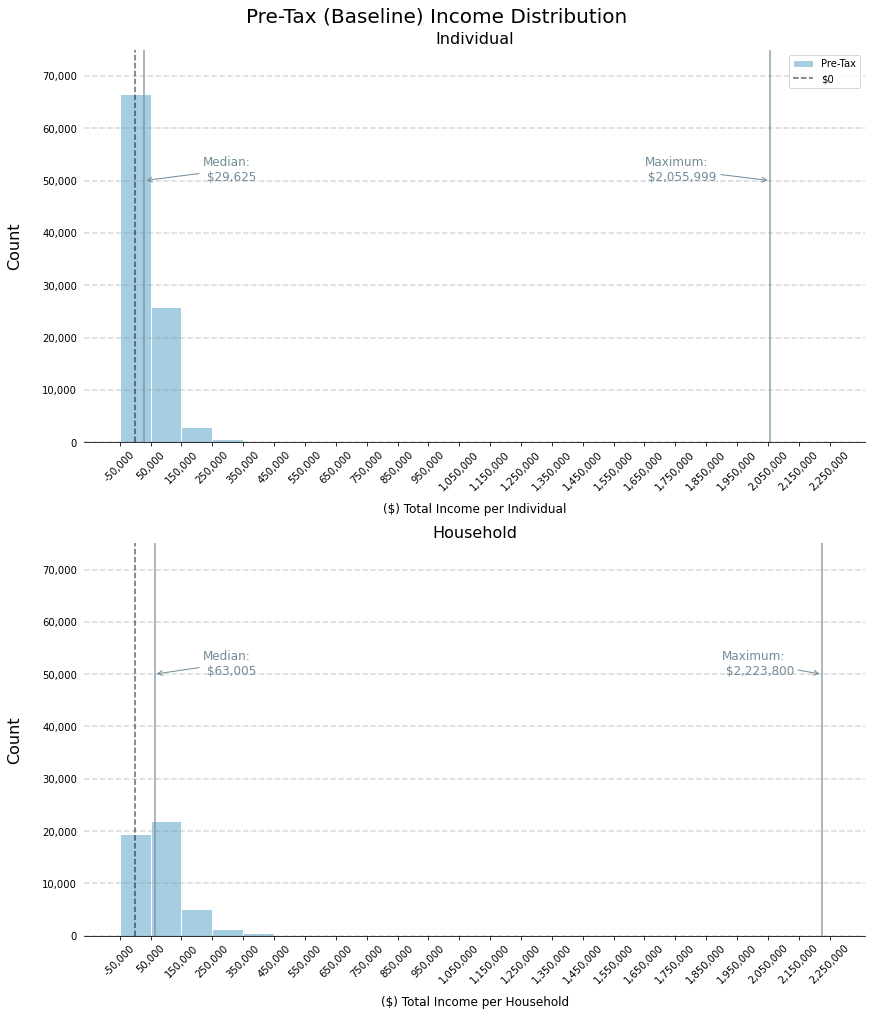

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 14), constrained_layout=True)

bins = np.arange(-50_000, 2_300_000, 100_000)

#assigning long colors 
pre_tax = (0.44749456473280025, 0.5442189568340771, 0.5952299195805278)
post_tax = (0.13127338987823528, 0.27751527607814364, 0.38095970787350786)
ubi = ('#33a02c')
nubi_main = ("#fb8072")
nubi_label = (0.8238685424331371, 0.4290123592475775, 0.38441179024460176)

axes[0].hist([df['INCTOT']], bins, label=['Pre-Tax'], color = [("#a6cee3")], align = 'mid', edgecolor = "white")
axes[1].hist([hh['HHINCOME']], bins, label=['Pre-Tax'], color = [("#a6cee3")], align = 'mid', edgecolor = "white")

# Set title
fig.suptitle("Pre-Tax (Baseline) Income Distribution", size=20) #y=0.93
axes[0].set_title("Individual", size=16) #, y=1
axes[1].set_title("Household", size=16) #y=0.5

##################################################### INDIVIDUAL #####################################################
#Format x-axis
axes[0].set_xticks(bins)
axes[0].set_xlabel("($) Total Income per Individual", labelpad=10, size=12) 
axes[0].ticklabel_format(useOffset=False, style='plain')
#ax.set_xticks(np.arange(-200_000, 2_500_000, 100_000))
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 45)
axes[0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
axes[0].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set y-axis label
axes[0].set_ylabel("Count", labelpad=20, size=16)
# Draw horizontal axis lines
vals = axes[0].get_yticks()
for tick in vals:
    axes[0].axhline(y=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)
axes[0].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].set_ylim(0, 75_000)

#adding other lines
axes[0].axvline(x=0, alpha=0.6, linestyle = "dashed", color='black', zorder=1, label = "$0")

#Pre-Tax
axes[0].axvline(x=max(df['INCTOT']), alpha=0.8, color=pre_tax, zorder=1)
axes[0].axvline(x=(df['INCTOT'].median()), alpha=0.8, color=pre_tax, zorder=1)

#annotations
#Pre-Tax
axes[0].annotate("Maximum:\n $2,055,999", xy=(max(df['INCTOT']), 50000), xytext=(1650000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 12, color=pre_tax)
axes[0].annotate("Median:\n $29,625", xy=(df['INCTOT'].median(), 50000), xytext=(220000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 12, color=pre_tax)


# Despine
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_visible(False)


##################################################### HOUSEHOLD #####################################################


#Format x-axis
axes[1].set_xticks(bins)
axes[1].set_xlabel("($) Total Income per Household", labelpad=10, size=12) 
axes[1].ticklabel_format(useOffset=False, style='plain')
#ax.set_xticks(np.arange(-200_000, 2_500_000, 100_000))
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 45)
axes[1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
axes[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set y-axis label
# Draw horizontal axis lines
vals = axes[0].get_yticks()
for tick in vals:
    axes[1].axhline(y=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)
axes[1].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1].set_ylim(0, 75_000)
axes[1].set_ylabel("Count", labelpad=20, size=16)

#adding other lines
axes[1].axvline(x=0, alpha=0.6, linestyle = "dashed", color='black', zorder=1, label = "$0")

#Pre-Tax
axes[1].axvline(x=max(hh['HHINCOME']), alpha=0.8, color=(0.44749456473280025, 0.5442189568340771, 0.5952299195805278), zorder=1)
axes[1].axvline(x=(hh['HHINCOME'].median()), alpha=0.8, color=(0.44749456473280025, 0.5442189568340771, 0.5952299195805278), zorder=1)


#annotations
#Pre-Tax
axes[1].annotate("Maximum:\n $2,223,800", xy=(max(hh['HHINCOME']), 50000), xytext=(1900000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 12, color=pre_tax)
axes[1].annotate("Median:\n $63,005", xy=(hh['HHINCOME'].median(), 50000), xytext=(220000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 12, color=pre_tax)


# Despine
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)

##################################################### BOTH #####################################################

axes[0].tick_params(axis='x', which='both', top=False)
axes[1].tick_params(axis='x', which='both', top=False)
axes[0].tick_params(left = False, right = False)
axes[1].tick_params(left = False, right = False)
axes[0].legend(loc='upper right', ncol=1)
plt.show() 
#plt.subplots_adjust(left=None, bottom=0.9, right=None, top=0.9, wspace=0.2, hspace=0.2)


According to this initial distribution of the sample members' pre-tax incomes, it appears that the median household has higher annual pre-tax income than when we view the income distribution by individuals alone. This is entirely undersetandable, since households (except for the one-person ones) combine the incomes of their members. The fact that the median household income is about double that of the median individual income could also imply that a good deal of the income gains from cohabition are going to two-person households, or that a large number of individuals are cohabitating and thus (roughly) doubling their income. 

**Pre-Tax Poverty Rate**

Individuals are classified by their household income as poor or not, so the remainder of age and race comparisons do not use household comparisons.

In [19]:
#define pre-tax poverty: 

def pov_pre_tax(row): 
    'write a function that defines someone as poor if their income is less than than the threshold for their family size'
    if row['HHINCOME'] <= row['THRESH']: 
        val = 1
    else: 
        val = 0
    return val 

#create new column 'Good' using the function above
df['POV_PRE_TAX'] = df.apply(pov_pre_tax, axis=1)

In [20]:
#reassign hh to include the new variables just calculated. 
hh = df.drop_duplicates(["CPSID"])

In [21]:
#individual
ind_pov_perc = (sum(df['POV_PRE_TAX'])/len(df))*100

#household:
hh_pov_perc = (sum(hh['POV_PRE_TAX'])/len(hh))*100

#store in dataframe

level = ['individual','household']
pre_tax = [ind_pov_perc, hh_pov_perc]

poverty_rates = pd.DataFrame()
poverty_rates['Level']  = level
poverty_rates['Pre-Tax Poverty Rate (%)'] = pre_tax

poverty_rates = poverty_rates.set_index(["Level"])
poverty_rates


,Pre-Tax Poverty Rate (%)
Level,
individual,8.580038
household,10.668767


For context, the CPS's actual reported statistic for the percentage of Americans living in poverty in 2019 was 10.5% (Dalaker, 2022, p. 5). Their statistical methods are significantly more accurate than mine, which can account for the discrepancy. In general, CPS poverty estimates are accurate up to a 90% confidence level. Note though that my research is conducted with a much smaller sample that of the CPS, so our numbers will not match perfectly. 

**Pre-Tax Poverty by Race**

In [22]:
def poverty_rate(df):
    """
    Calculates poverty rate for any demographic you are interested in.
    
    Arguments:
    ----------
        df (pandas dataframe): a dataframe to calculate the poverty rate for.
        
    Returns:
    --------
        the poverty rate
    """
    try: 
        poverty_rate = (sum(df['POV_PRE_TAX'])/len(df))*100
    
    except ZeroDivisionError: #to account for any times that there are no observations for a given groupo (len(df) = 0)
        poverty_rate = 0

    return(poverty_rate)



In [23]:
race_pop = df.groupby(['RACE_CAT'])["CPSIDP"].size().to_frame().rename(columns={"CPSIDP": "RACE_POP"}).reset_index()
race_pop

,RACE_CAT,RACE_POP
0,American Indian-Asian,4
1,American Indian-Hawaiian/Pacific Islander,1
2,American Indian/Aleut/Eskimo,1203
3,Asian Only,5249
4,Asian-Hawaiian/Pacific Islander,58
5,Black,9771
6,Black-American Indian,94
7,Black-Asian,19
8,Black-Hawaiian/Pacific Islander,6
9,"Four or five races, unspecified",5


In [24]:
race_pov = df.groupby(['RACE_CAT']).apply(poverty_rate).to_frame().rename(columns={0: "RACE_POV"}).reset_index().merge(race_pop, how = "left", on = "RACE_CAT").sort_values(by='RACE_POV')
df = df.merge(race_pov, how = "left", on = "RACE_CAT")
race_pov

,RACE_CAT,RACE_POV,RACE_POP
11,"Two or three races, unspecified",0.000000,1
1,American Indian-Hawaiian/Pacific Islander,0.000000,1
21,White-Black-American Indian-Asian,0.000000,3
19,White-Black--Hawaiian/Pacific Islander,0.000000,1
14,White-American Indian-Asiain-Hawaiian/Pacific ...,0.000000,1
22,White-Black-Asian,0.000000,9
9,"Four or five races, unspecified",0.000000,5
7,Black-Asian,0.000000,19
8,Black-Hawaiian/Pacific Islander,0.000000,6
23,White-Hawaiian/Pacific Islander,3.333333,90


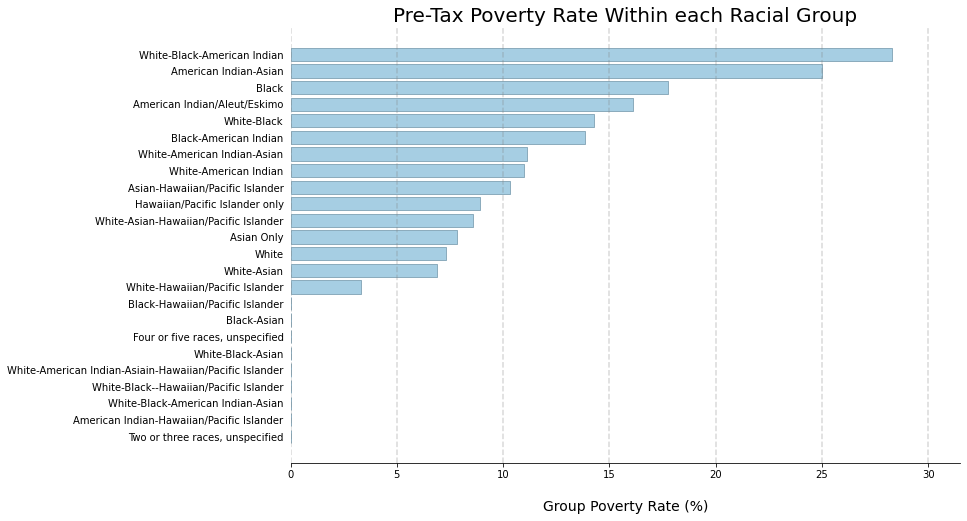

In [25]:
#plot poverty by race: 


fig, ax = plt.subplots(figsize=(12, 8))
plt.barh(race_pov['RACE_CAT'], race_pov['RACE_POV'], color = ('#a6cee3'), alpha = 1, edgecolor = (0.5492374784448315, 0.6760310470444896, 0.7427129990059502))

# Set title
ax.set_title("Pre-Tax Poverty Rate Within each Racial Group", size=20)

#Format x-axis
ax.set_xlabel("Group Poverty Rate (%)", labelpad=20, size=14) 
#ax.set_xticks(race_pov['RACE_POV'])
#plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#removing frame 
plt.tick_params(axis='y', which='both', top=False, left = False, right = False)
plt.tick_params(axis='x', which='both', top=False)
  

It is important to note when viewing these results that, while percentages for a large number of minority racial/ethnic groups are high, those groups also have incredibly small populations. This is especially true for the American Indian-Asian and White-Black-American Indian and other mixed groups, who tend to have total populations below 100 people (see the race_pov table in the previous cell). Thus, a 30% poverty rate for a mixed group with a population of 53 is not the same level of severity as a 17% poverty rate for a single-race group, such as Black, which is far more severe for a population of 9,771 individuals. This fact is important to keep in mind when interpreting these models' impacts on racial poverty. 

**Pre-Tax Poverty by Age**

I was originally planning to use qcut to accomplish this, but realized it was splitting the total number of observations into equal parts, which I do not want, so I wrote my own function. 

In [26]:
#generate income deciles poverty: 
bins= [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
#labels = ['15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64', '65-69','70-74','75-79','80-84','85-90']
labels = ['15','20','25','30','35','40','45','50','55','60', '65','70','75','80','85','90']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)


In [27]:
#check that my work is correct

df[["AGE", "AGE_GROUP"]].tail(50)

,AGE,AGE_GROUP
96523,39,35
96524,41,40
96525,35,35
96526,37,35
96527,30,30
96528,29,25
96529,70,70
96530,65,65
96531,46,45
96532,41,40


In [28]:
age_group_pov = df.groupby(['AGE_GROUP']).apply(poverty_rate).to_frame().rename(columns={0: "AGE_POV_GROUP"}).reset_index()
age_group_pov
df=df.merge(age_group_pov, how = "left", on = "AGE_GROUP")

In [29]:
age_group_pov

,AGE_GROUP,AGE_POV_GROUP
0,15,11.662497
1,20,9.178082
2,25,8.163823
3,30,7.688378
4,35,8.708592
5,40,7.538526
6,45,6.190933
7,50,7.006455
8,55,8.085928
9,60,8.940518


I realize the plot below is a type of reverse-engineered histogram, but it was necessary since poverty rates, as they are percentages, need to be recalculated by age group each time the groups change. 

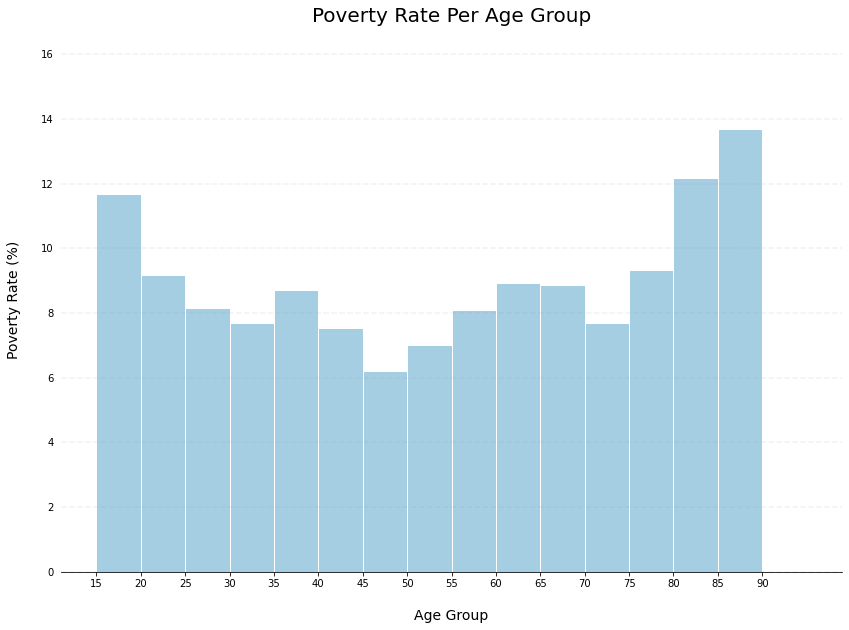

In [30]:
#plot poverty rate by age-group: 

fig, ax = plt.subplots(figsize=(14, 10))
plt.bar(age_group_pov['AGE_GROUP'], age_group_pov['AGE_POV_GROUP'], align = 'edge', color = ('#a6cee3'), width = 1, edgecolor = "white", linewidth = 1, alpha = 1)

# Set title
ax.set_title("Poverty Rate Per Age Group", size=20)

#Format x-axis
ax.set_xlabel("Age Group", labelpad=20, size=14) 
ax.set_xticks(age_group_pov["AGE_GROUP"])
#plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
#ax.tick_params('x', rotation = 90)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="on", labelleft="on")

# Set y-axis label
ax.set_ylabel("Poverty Rate (%)", labelpad=20, size=14)
# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.1, color='grey', zorder=1)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#removing frame 
plt.tick_params(axis='x', which='both', top=False)
plt.tick_params(axis='y', which='both', top=False, left = False, right = False)
#plt.xticks(np.arange(15, 90, 5))

Note that the poverty rate is higher for people under 20, but reaches a minimum around middle age, after which it continues to spike for the elderly. 

**Pre-Tax Income Inequality: Gini Index**|

I use the Gini Index to measure the baseline level of income inequality in the sample before applying any tax models. According to Stats.direct.com, "the Gini coefficient was developed by the Italian Statistician Corrado Gini as a summary measure of income inequality in society. It is usually associated with the plot of wealth concentration introduced a few years earlier by Max Lorenz. Since these measures were introduced, they have been applied to topics other than income and wealth, but mostly within Economics. G [the Gini Coefficient] is a measure of inequality, defined as the mean of absolute differences between all pairs of individuals for some measure. The minimum value is 0 when all measurements are equal and the theoretical maximum is 1 for an infinitely large set of observations where all measurements but one has a value of 0, which is the ultimate inequality. When G is based on the Lorenz curve of income distribution, it can be interpreted as the expected income gap between two individuals randomly selected from the population. If the x values are first placed in ascending order, such that each x has rank i, the some of the comparisons above can be avoided and computation is quicker" (*Gini Coefficient of Inequality*). 

To compute the Gini coefficient, I use the mathematical formula associated with the latter method, as described above. The formula I base my function off of is as follows: 

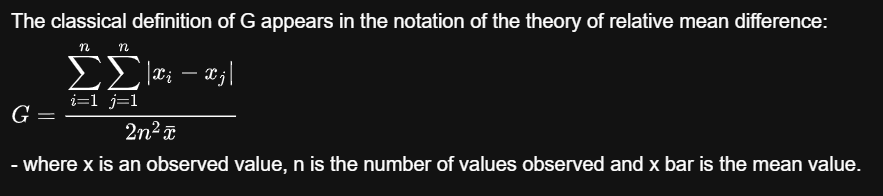(*Gini Coefficient of Inequality*)



In [31]:
#define function to calculate Gini coefficient
def gini(x):
    """Takes income array and calculates the gini coefficient from it"""
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))



In [32]:
#define NumPy array of income values
incomes = np.asarray(df['INCTOT'])

#calculate Gini coefficient for array of incomes
ind_gini = gini(incomes)

#define NumPy array of income values
incomes = np.asarray(hh['HHINCOME'])

#calculate Gini coefficient for array of incomes
hh_gini = gini(incomes)


*Store Results:*

In [33]:
#store in dataframe

level = ['individual','household']
pre_tax = [ind_gini, hh_gini]

gini_index = pd.DataFrame()
gini_index['Level']  = level
gini_index['Pre-Tax Gini'] = pre_tax

gini_index = gini_index.set_index(["Level"])
gini_index

,Pre-Tax Gini
Level,
individual,0.568350
household,0.482488


In general what we see from this result with the Gini index is that, at the individual level, income inequality is starker than at the household level before taxes. This is not a suprising result, since the individual level does not allow for incorporating two or more incomes, as many cohabitating couples do, for example, or other income combining. 

### Post-Tax: 
The next step is calculate new post-tax incomes of everyone in the sample. I do this at the individual and household levels. At the individual level, this tax is straightforward - subtract the amount owed from the pre-tax income. At the household level, this task is not so simple. To simulate the effects on household income caused by the imposition of taxes, I need to subtract the amount each household owes from the amount of income each household has. Unfortunately, despite my searching, the ASEC file does not have variable that contains data on tax and benefit liability on a per household level. Having this data at the household level would have been beneficial, since that is the level at which poverty is assigned and calculated according to the federal poverty thresholds I am using to define pvoerty. FEDTAXAC (federal tax liability after credits, including additional child tax credit and the earned income tax credit) does contain this data, only per individual. To be able to calculate poverty after taxes, I have grouped the FEDTAXAC by household and then summed the total amount of each individuals' tax liability, and then created a new variable, FEDTAXAC_HH, which contains the total amount of credits assigned to each household now, to hold this information. I then subtract FEDTAXAC_HH from the pre-tax household income (HHINCOME), which is listed according to CPSID (the household indicator), to generate POST_TAX_INC (post-tax income). 

Note that, for individuals who are net receivers of federal benefits rather than net payers, FEDTAXAC is negative, since they receive credits. Individuals who are net payers, but net receivers (recipients of the child tax credit or the earned income tax credit, which essentially pay recipients for turning in their tax forms) have a positive entry in this column. Thus, subtracting FEDTAXAC_SUM from the HHINCOME column reflects the net benefits each household receives. 

**Calculate Post-Tax Income:**

In [34]:
#overview of FEDTAXAC before I begin the process described above: 

summary = df.agg(
    {
        "FEDTAXAC": ["min", "max", "mean", "median"]
    }
)

summary.round()

,FEDTAXAC
min,-9896.0
max,884159.0
mean,4724.0
median,0.0


*Individual*

In [35]:
#find post-tax income (subtract amount received or lost from taxes from original family income)
df["POST_TAX_INC_IN"] = df["INCTOT"] - df["FEDTAXAC"]

#find percent change from original income 

#df["INC_CHANGE_PERC_IN"] = ((df["POST_TAX_INC_IN"] - df['INCTOT'])/df["INCTOT"])*100

*Household*

In [36]:
#find post-tax income. Take each household, find the net benefits each member of the household has, add those up, and assign that sum to a variable. 

#calculate net benefits per household
fedtaxac_sum = df.groupby(['CPSID'])['FEDTAXAC'].sum().to_frame().rename(columns={"FEDTAXAC": "FEDTAXAC_HH"}).reset_index()
df = df.merge(fedtaxac_sum, how = "left", on = "CPSID")

#find post-tax income (subtract amount received or lost from taxes from original family income)
df["POST_TAX_INC_HH"] = df["HHINCOME"] - df["FEDTAXAC_HH"]

#find percent change from original income 

#df["INC_CHANGE_PERC_HH"] = ((df["POST_TAX_INC_HH"] - df['HHINCOME'])/df["HHINCOME"])*100

In [37]:
#reassign hh to include the new variables just calculated. 
hh = df.drop_duplicates(["CPSID"])

In [38]:
#view changes per individual

ind_summary = df.agg(
    {
        "INCTOT": ["min", "max", "mean", "median"], 
        "POST_TAX_INC_IN": ["min", "max", "mean", "median"]
    }
)

#view changes per household

hh_summary = hh.agg(
    {
        "HHINCOME": ["min", "max", "mean", "median"], 
        "POST_TAX_INC_HH": ["min", "max", "mean", "median"]
    }
)

ind_summary.round()

,INCTOT,POST_TAX_INC_IN
min,-13000.0,-365822.0
max,2055999.0,1422314.0
mean,45183.0,40460.0
median,29625.0,28030.0


**Post-Tax Income Distribution**

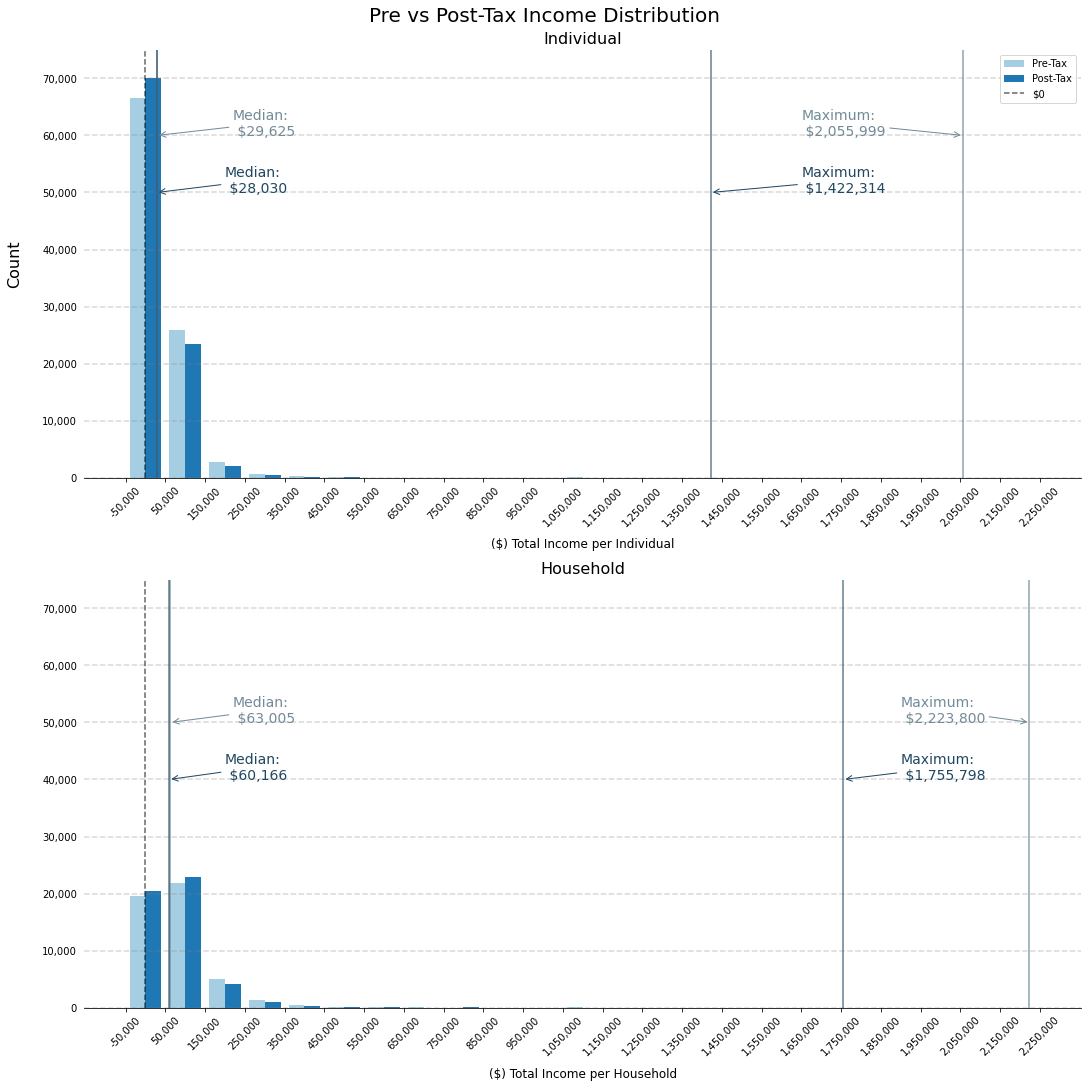

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15), constrained_layout=True)

bins = np.arange(-50_000, 2_300_000, 100_000)

#assigning long colors 
pre_tax = (0.44749456473280025, 0.5442189568340771, 0.5952299195805278)
post_tax = (0.13127338987823528, 0.27751527607814364, 0.38095970787350786)
ubi = ('#33a02c')
nubi_main = ("#fb8072")
nubi_label = (0.8238685424331371, 0.4290123592475775, 0.38441179024460176)

axes[0].hist([df['INCTOT'], df['POST_TAX_INC_IN']], bins, label=['Pre-Tax', 'Post-Tax'], color = [("#a6cee3"), ("#1f78b4")], align = 'mid')
axes[1].hist([hh['HHINCOME'], hh['POST_TAX_INC_HH']], bins, label=['Pre-Tax', 'Post-Tax'], color = [("#a6cee3"), ("#1f78b4")], align = 'mid')

# Set title
fig.suptitle("Pre vs Post-Tax Income Distribution", size=20) #y=0.93
axes[0].set_title("Individual", size=16) #, y=1
axes[1].set_title("Household", size=16) #y=0.5

#####################################################INDIVIDUAL
#Format x-axis
axes[0].set_xticks(bins)
axes[0].set_xlabel("($) Total Income per Individual", labelpad=10, size=12) 
axes[0].ticklabel_format(useOffset=False, style='plain')
#ax.set_xticks(np.arange(-200_000, 2_500_000, 100_000))
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 45)
axes[0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
axes[0].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set y-axis label
axes[0].set_ylabel("Count", labelpad=20, size=16)
# Draw horizontal axis lines
vals = axes[0].get_yticks()
for tick in vals:
    axes[0].axhline(y=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)
axes[0].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].set_ylim(0, 75_000)

#adding other lines
axes[0].axvline(x=0, alpha=0.6, linestyle = "dashed", color='black', zorder=1, label = "$0")

#Pre-Tax
axes[0].axvline(x=max(df['INCTOT']), alpha=0.8, color=pre_tax, zorder=1)
axes[0].axvline(x=(df['INCTOT'].median()), alpha=0.8, color=pre_tax, zorder=1)

#Post-Tax
axes[0].axvline(x=max(df['POST_TAX_INC_IN']), alpha=0.7, color=post_tax, zorder=1)
axes[0].axvline(x=(df['POST_TAX_INC_IN'].median()), alpha=0.7, color=post_tax, zorder=1)

#annotations
#Pre-Tax
axes[0].annotate("Maximum:\n $2,055,999", xy=(max(df['INCTOT']), 60000), xytext=(1650000, 60000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 14, color=pre_tax)
axes[0].annotate("Median:\n $29,625", xy=(df['INCTOT'].median(), 60000), xytext=(220000, 60000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 14, color=pre_tax)

#Post-Tax
axes[0].annotate("Maximum:\n $1,422,314", xy=(max(df['POST_TAX_INC_IN']), 50000), xytext=(1650000, 50000), arrowprops=dict(color=post_tax, arrowstyle="->"), size = 14, color=post_tax)
axes[0].annotate("Median:\n $28,030", xy=(df['POST_TAX_INC_IN'].median(), 50000), xytext=(200000, 50000), arrowprops=dict(color=post_tax, arrowstyle="->"), size = 14, color=post_tax)

# Despine
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_visible(False)



#####################################################HOUSEHOLD


#Format x-axis
axes[1].set_xticks(bins)
axes[1].set_xlabel("($) Total Income per Household", labelpad=10, size=12) 
axes[1].ticklabel_format(useOffset=False, style='plain')
#ax.set_xticks(np.arange(-200_000, 2_500_000, 100_000))
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 45)
axes[1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
axes[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set y-axis label
# Draw horizontal axis lines
vals = axes[0].get_yticks()
for tick in vals:
    axes[1].axhline(y=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)
axes[1].get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1].set_ylim(0, 75_000)

#adding other lines
axes[1].axvline(x=0, alpha=0.6, linestyle = "dashed", color='black', zorder=1, label = "$0")

#Pre-Tax
axes[1].axvline(x=max(hh['HHINCOME']), alpha=0.8, color=(0.44749456473280025, 0.5442189568340771, 0.5952299195805278), zorder=1)
axes[1].axvline(x=(hh['HHINCOME'].median()), alpha=0.8, color=(0.44749456473280025, 0.5442189568340771, 0.5952299195805278), zorder=1)

#Post-Tax
axes[1].axvline(x=max(hh['POST_TAX_INC_HH']), alpha=0.7, color=(0.13127338987823528, 0.27751527607814364, 0.38095970787350786), zorder=1)
axes[1].axvline(x=(hh['POST_TAX_INC_HH'].median()), alpha=0.7, color=(0.13127338987823528, 0.27751527607814364, 0.38095970787350786), zorder=1)

#annotations
#Pre-Tax
axes[1].annotate("Maximum:\n $2,223,800", xy=(max(hh['HHINCOME']), 50000), xytext=(1900000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 14, color=pre_tax)
axes[1].annotate("Median:\n $63,005", xy=(hh['HHINCOME'].median(), 50000), xytext=(220000, 50000), arrowprops=dict(color=pre_tax, arrowstyle="->"), size = 14, color=pre_tax)

#Post-Tax
axes[1].annotate("Maximum:\n $1,755,798", xy=(max(hh['POST_TAX_INC_HH']), 40000), xytext=(1900000, 40000), arrowprops=dict(color=post_tax, arrowstyle="->"), size = 14, color=post_tax)
axes[1].annotate("Median:\n $60,166", xy=(hh['POST_TAX_INC_HH'].median(), 40000), xytext=(200000, 40000), arrowprops=dict(color=post_tax, arrowstyle="->"), size = 14, color=post_tax)

# Despine
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)

#####################################################BOTH

axes[0].tick_params(axis='x', which='both', top=False)
axes[1].tick_params(axis='x', which='both', top=False)
axes[0].tick_params(left = False, right = False)
axes[1].tick_params(left = False, right = False)
axes[0].legend(loc='upper right', ncol=1)
plt.show() 
#plt.subplots_adjust(left=None, bottom=0.9, right=None, top=0.9, wspace=0.2, hspace=0.2)


From these results we see that the post-tax system does appear to reduce some inequality in the income distribution, since it is able to move down the maximum values quite substantially at both the individual and household levels. Towards the middle of the distribution (the median), it actually reduces incomes. This is understandable, since on net those in the middle would likely owe taxes rather than receive net benefits. 

**Post-Tax Poverty Rate:**

In [40]:
#Write a function that classifies individuals as rich or poor based on if their household falls below their assigned poverty threshold. 

def pov_post_tax(row): 
    'write a function that defines someone as poor if their income is less than than the threshold for their family size'
    if row['POST_TAX_INC_HH'] <= row['THRESH']: 
        val = 1
    else: 
        val = 0
    return val 

#create new column 'Good' using the function above
df['POV_POST_TAX'] = df.apply(pov_post_tax, axis=1)

In [41]:
#reassign hh to include the new variables just calculated. 
hh = df.drop_duplicates(["CPSID"])

In [42]:
#reporting the percent of individuals that fall into poverty: 

ind_pov_perc = (sum(df['POV_POST_TAX'])/len(df))*100

#household poverty: 
pov_phh_pov_perc = (sum(hh['POV_POST_TAX'])/len(hh))*100

In [43]:
#store in dataframe

post_tax = [ind_pov_perc, hh_pov_perc]
poverty_rates['Post-Tax Poverty Rate (%)'] = post_tax

poverty_rates


,Pre-Tax Poverty Rate (%),Post-Tax Poverty Rate (%)
Level,,
individual,8.580038,7.642923
household,10.668767,10.668767


The poverty did go down overall after imposing taxes. We will see if this same result holds for the various demographic groups. Interestingly, the poverty rate for households is higher than individuals. This could be due to the fact that the household level tends to aggregate individuals together, so the numerator might simply be a little larger in comparison to the relatively smaller number of households over individuals, leading to the discrepancy. 

**Post -Tax Poverty by Race**

This is at the individual level, since it race is an individual characteristic. 

In [44]:
def post_pov_rate(df):
    """
    Calculates poverty rate for any demographic you are interested in.
    
    Arguments:
    ----------
        df (pandas dataframe): a dataframe to calculate the poverty rate for.
        
    Returns:
    --------
        the poverty rate
    """
    try:
        post_pov_rate = (sum(df['POV_POST_TAX'])/len(df))*100
    
    except ZeroDivisionError: #to account for any times that there are no observations for a given groupo (len(df) = 0)
        post_pov_rate = 0
    
    return(post_pov_rate)


In [45]:

post_race_pov = df.groupby(['RACE_CAT']).apply(post_pov_rate).to_frame().rename(columns={0: "POST_RACE_POV"}).reset_index().sort_values(by='POST_RACE_POV')
df = df.merge(post_race_pov, how = "left", on = "RACE_CAT")
total_race_pov = race_pov.merge(post_race_pov, how = "left", on = "RACE_CAT")
total_race_pov

,RACE_CAT,RACE_POV,RACE_POP,POST_RACE_POV
0,"Two or three races, unspecified",0.000000,1,0.000000
1,American Indian-Hawaiian/Pacific Islander,0.000000,1,0.000000
2,White-Black-American Indian-Asian,0.000000,3,0.000000
3,White-Black--Hawaiian/Pacific Islander,0.000000,1,0.000000
4,White-American Indian-Asiain-Hawaiian/Pacific ...,0.000000,1,0.000000
5,White-Black-Asian,0.000000,9,0.000000
6,"Four or five races, unspecified",0.000000,5,0.000000
7,Black-Asian,0.000000,19,0.000000
8,Black-Hawaiian/Pacific Islander,0.000000,6,0.000000
9,White-Hawaiian/Pacific Islander,3.333333,90,3.333333


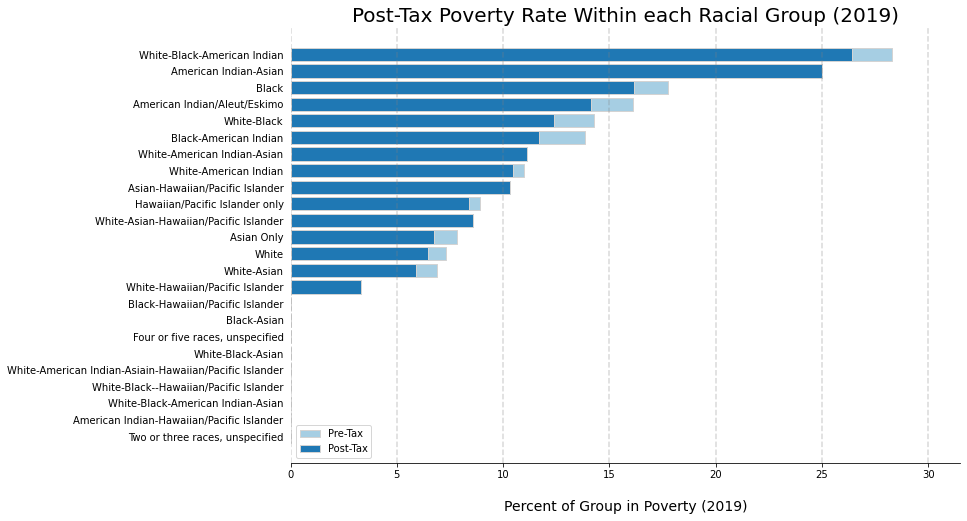

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.barh(total_race_pov['RACE_CAT'], total_race_pov['RACE_POV'], color = ('#a6cee3'), label = "Pre-Tax", edgecolor = "lightgrey")
plt.barh(total_race_pov['RACE_CAT'], total_race_pov['POST_RACE_POV'], color = ('#1f78b4'), label = "Post-Tax", edgecolor = "lightgrey")

# Set title
ax.set_title("Post-Tax Poverty Rate Within each Racial Group (2019)", size=20)

#Format x-axis
ax.set_xlabel("Percent of Group in Poverty (2019)", labelpad=20, size=14) 
#ax.set_xticks(race_pov['RACE_POV'])
#plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#removing frame 
plt.tick_params(axis='y', which='both', top=False, left = False, right = False)
plt.tick_params(axis='x', which='both', top=False)
plt.legend()

I originally intended to also display the percent change in poverty in each race, but the results over-exaggerate the effects of the tax (a move from a total population of 4 in poverty to 2 is a 50% reduction, which makes it look like the tax is more effective than it is.) However, my original percent change plot is in the appendix for reference. 

Also note that there are no races for which the post-tax poverty rate is higher than the pre-tax, so on net, there was a reducing effect for poverty by race. This fact also means that the dark blue bars at no point hide the light blue bars. 

**Post-Tax Poverty by Age**

This is individual, since age is an individual characteristic. 

In [47]:
post_age_group_pov = df.groupby(['AGE_GROUP']).apply(post_pov_rate).to_frame().rename(columns={0: "POST_AGE_GROUP_POV"}).reset_index()
post_age_group_pov
df=df.merge(post_age_group_pov, how = "left", on = "AGE_GROUP")

In [48]:
total_age_group_pov = age_group_pov.merge(post_age_group_pov, how = "left", on = "AGE_GROUP")
total_age_group_pov

,AGE_GROUP,AGE_POV_GROUP,POST_AGE_GROUP_POV
0,15,11.662497,9.063108
1,20,9.178082,8.295282
2,25,8.163823,7.003413
3,30,7.688378,5.925926
4,35,8.708592,6.444099
5,40,7.538526,6.025267
6,45,6.190933,5.122586
7,50,7.006455,6.495428
8,55,8.085928,7.808351
9,60,8.940518,8.879698


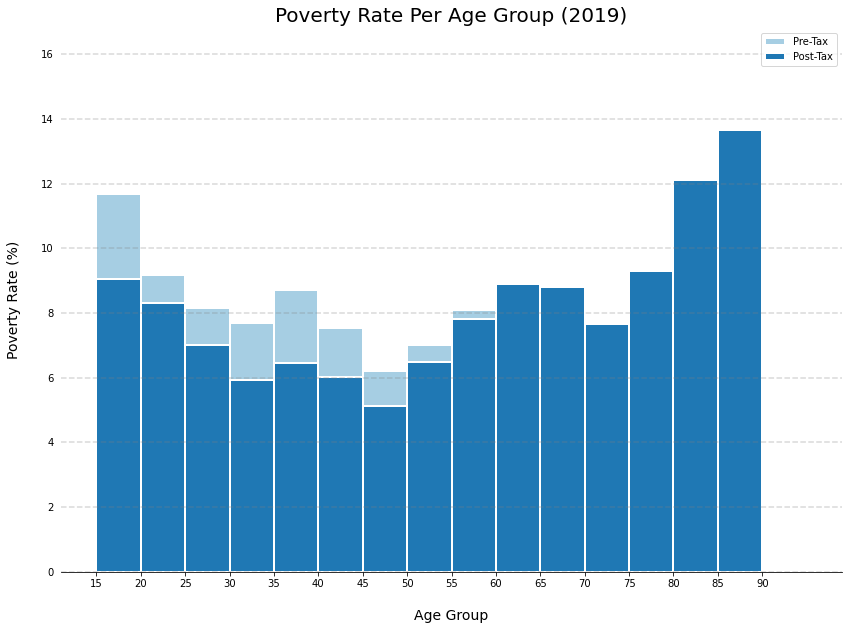

In [49]:

#plot poverty rate by age-group: 

fig, ax = plt.subplots(figsize=(14, 10))
plt.bar(total_age_group_pov['AGE_GROUP'], total_age_group_pov['AGE_POV_GROUP'], align = 'edge', color = ('#a6cee3'), width = 1, edgecolor = "white", linewidth = 2, label = "Pre-Tax")
plt.bar(total_age_group_pov['AGE_GROUP'], total_age_group_pov['POST_AGE_GROUP_POV'], align = 'edge', color = ('#1f78b4'), width = 1, edgecolor = "white", linewidth = 2, label = "Post-Tax")

# Set title
ax.set_title("Poverty Rate Per Age Group (2019)", size=20)

#Format x-axis
ax.set_xlabel("Age Group", labelpad=20, size=14) 
ax.set_xticks(total_age_group_pov["AGE_GROUP"])
#plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
#ax.tick_params('x', rotation = 90)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="on", labelleft="on")

# Set y-axis label
ax.set_ylabel("Poverty Rate (%)", labelpad=20, size=14)
# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.3, color='grey', zorder=1)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#removing frame 
plt.tick_params(axis='x', which='both', top=False)
plt.tick_params(axis='y', which='both', top=False, left = False, right = False)
plt.legend()
#plt.xticks(np.arange(15, 90, 5))

In general here we see that the imposition of the tax system reduced poverty for younger ages, but does little (if anything) for elderly poverty. This is likely because the baseline already includes other forms of income as pre-tax income, such as Supplemental Security Income and Social Security Income (and disability benefits), which are distributed on a regular basis as income and not returned as tax credits, like the Earned Income Tax Credit and Child Tax Credit are. Unfortunately, this dataset and the scope of this project are limited. 

**Post -Tax Income Inequality: Gini Index**

In [50]:
#household 
#define NumPy array of income values
incomes = np.asarray(df['POST_TAX_INC_IN'])

#calculate Gini coefficient for array of incomes (use prior gini index function)
ind_gini = gini(incomes)


In [51]:
#household 
#define NumPy array of income values
incomes = np.asarray(hh['POST_TAX_INC_HH'])

#calculate Gini coefficient for array of incomes (use prior gini index function)
hh_gini = gini(incomes)



In [52]:

post_tax = [ind_gini, hh_gini]
gini_index['Post-Tax Gini'] = post_tax
gini_index

,Pre-Tax Gini,Post-Tax Gini
Level,,
individual,0.568350,0.564119
household,0.482488,0.450054


Very interestingly the U.S. tax code, even without benefits imperfenctly accounted for, does appear to reduce the gini index slightly, although these results are starker for the household level than the individual level. This could be because households receive more benefits, on net. For example, the current tax code tends to offer benefits to married couples, so reductions in income inequality may be more noticeable at the houeshold level. We will see if the UBI models can improve upon these results. 

**Post-Tax Total Collected Federal Revenues**

In [53]:
fed_rev = sum(df['FEDTAXAC'])
fed_rev

456179028

Note that I calculate the total amount of federal revenues by summing an individual-based variable, FEDTAXAC, since it is the only variable that reflects net benefits, and is only collected at the individual level. 

### Assign Results to Dataframe 
And apply to Part 2 Notebook for remaining work. 

In [54]:
df.to_csv('part_1_df.csv')
poverty_rates.to_csv('poverty_rates.csv')
gini_index.to_csv('gini_index.csv')
